In [1]:
import pandas as pd
from plotly.offline import iplot
import plotly.graph_objects as go


In [2]:
df = pd.read_csv("spotify_top_songs_audio_features.csv")

In [3]:
attributes = [
    "danceability",
    "energy",
    "speechiness",
    "acousticness",
    "instrumentalness",
    "liveness",
    "valence",
    "loudness",
    "tempo",
]

In [4]:
df[
    [
        "danceability",
        "energy",
        "speechiness",
        "acousticness",
        "instrumentalness",
        "liveness",
        "valence",
        "loudness",
        "tempo",
        "duration_ms",
        "streams",
    ]
].corr()

,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,loudness,tempo,duration_ms,streams
danceability,1.000000,0.132397,0.184578,-0.248447,-0.081519,-0.081186,0.346597,0.188109,-0.058747,-0.155502,0.011551
energy,0.132397,1.000000,-0.007855,-0.515303,-0.069500,0.135981,0.375763,0.727379,0.095561,0.013937,0.001399
speechiness,0.184578,-0.007855,1.000000,-0.075279,-0.048271,0.055040,0.037357,-0.064261,0.123775,-0.039070,-0.085806
acousticness,-0.248447,-0.515303,-0.075279,1.000000,0.063984,-0.045413,-0.081847,-0.427972,-0.071007,-0.034989,0.012926
instrumentalness,-0.081519,-0.069500,-0.048271,0.063984,1.000000,-0.005276,-0.112222,-0.182663,-0.006436,-0.034694,-0.019188
liveness,-0.081186,0.135981,0.055040,-0.045413,-0.005276,1.000000,0.036476,0.059125,-0.002338,0.000673,-0.039445
valence,0.346597,0.375763,0.037357,-0.081847,-0.112222,0.036476,1.000000,0.300003,0.051097,-0.152047,0.037192
loudness,0.188109,0.727379,-0.064261,-0.427972,-0.182663,0.059125,0.300003,1.000000,0.066723,0.016177,0.035809
tempo,-0.058747,0.095561,0.123775,-0.071007,-0.006436,-0.002338,0.051097,0.066723,1.000000,-0.017492,-0.012052
duration_ms,-0.155502,0.013937,-0.039070,-0.034989,-0.034694,0.000673,-0.152047,0.016177,-0.017492,1.000000,0.014761


<sup>There is little to no correlation using any common method (Pearson, Spearman or Kendall)</sup>

The analysis shows that no single attribute has a reasonable impact to determine the song as a top stream one

So we head to another method of analysis. What do most played artists have in common?

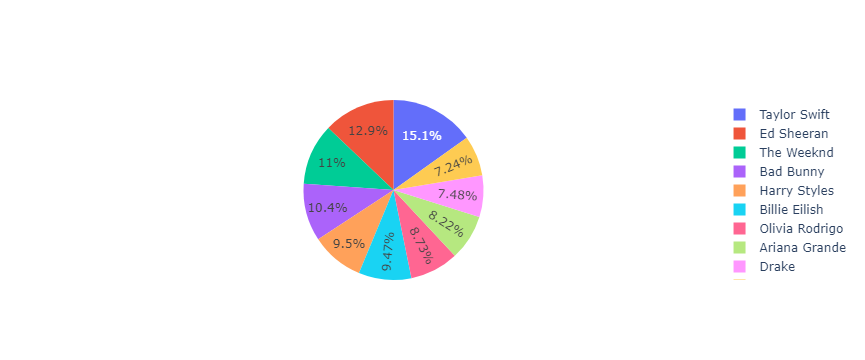

In [25]:
most_played_artist = (
    df.groupby("artist_names").streams.sum().sort_values(ascending=False).head(10)
)

iplot([go.Pie(
    labels=most_played_artist.index,
    values=most_played_artist.values
)])

In [26]:
df.query("artist_names.isin(@most_played_artist.index)").describe()

,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,loudness,tempo,duration_ms,weeks_on_chart,streams
count,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,6.900000e+02
mean,0.633333,0.567461,0.095942,0.317339,0.022059,0.163662,0.401890,-7.433603,120.820703,214730.668116,14.684058,1.474301e+08
std,0.144520,0.185229,0.093973,0.300453,0.103800,0.114994,0.212712,3.169591,30.025437,51922.845650,31.972437,3.490316e+08
min,0.153000,0.021800,0.023200,0.000227,0.000000,0.042400,0.036200,-31.160000,56.829000,36935.000000,1.000000,2.968164e+06
25%,0.530250,0.444250,0.038450,0.057625,0.000000,0.097925,0.236250,-8.816750,95.940750,184032.250000,1.000000,1.414765e+07
50%,0.639000,0.582000,0.056850,0.208500,0.000004,0.117000,0.378500,-6.810500,120.018500,211190.500000,3.000000,3.164446e+07
75%,0.747000,0.709000,0.109000,0.553750,0.000106,0.180750,0.544750,-5.335000,141.953500,238823.500000,12.000000,1.060347e+08
max,0.939000,0.959000,0.717000,0.984000,0.927000,0.752000,0.942000,-1.248000,208.918000,613027.000000,363.000000,3.528450e+09


Seems like their songs have below average valence and above average acousticness. Maybe some melancholic feeling songs?

Let's filter songs that have their attributes above the average of top played artists

In [32]:
top_played_filters = df.query("artist_names.isin(@most_played_artist.index)")[
    attributes
].mean()
query = ""
for el in top_played_filters.items():
    query += f"{el[0]} >= {el[1]} &"
query = query.strip(" &")

df.query(query)

,id,artist_names,track_name,source,key,mode,time_signature,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,loudness,tempo,duration_ms,weeks_on_chart,streams


Seems like there are no songs that meet the criteria let's go for another type of analysis

Let's check the attributes of most played songs

In [7]:
df.sort_values(by=["streams", "weeks_on_chart"], ascending=False).head(100).describe()

,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,loudness,tempo,duration_ms,weeks_on_chart,streams
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,1.000000e+02
mean,0.665750,0.627780,0.085690,0.263096,0.003708,0.171310,0.477784,-6.004350,119.398790,209029.870000,126.370000,1.396428e+09
std,0.140219,0.143139,0.079352,0.246870,0.019658,0.136250,0.215789,1.978642,27.778113,38895.890788,69.573688,5.470481e+08
min,0.336000,0.296000,0.023200,0.000282,0.000000,0.047600,0.060500,-10.965000,67.528000,119133.000000,26.000000,8.830340e+08
25%,0.574250,0.534000,0.037525,0.054000,0.000000,0.092325,0.323750,-7.212250,98.022750,182054.000000,78.000000,9.926551e+08
50%,0.680000,0.650000,0.052950,0.174500,0.000000,0.114500,0.477500,-5.746000,116.963000,207900.000000,107.500000,1.231603e+09
75%,0.762500,0.730250,0.098700,0.420500,0.000027,0.180000,0.596000,-4.581000,134.331500,233714.750000,154.500000,1.517896e+09
max,0.921000,0.965000,0.375000,0.934000,0.144000,0.790000,0.934000,-2.749000,186.003000,354320.000000,367.000000,3.528450e+09


Top 100 songs by streams and time on chart seems to be the best bet on catchy songs.

Doing a quick analysis, it's clear they are not instrumental, acoustic, live or speechy songs

Given we are looking for most danceable songs, let's analyze songs with danceability above average

In [8]:
danceability_filter = round(df.danceability.mean(), 2)
sort_by = ["streams", "weeks_on_chart", "danceability"]
danceable = (
    df.query("danceability >= @danceability_filter").sort_values(by=sort_by).head(100)
)
danceable.describe()

,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,loudness,tempo,duration_ms,weeks_on_chart,streams
count,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.00000,100.00000,100.000000,1.000000e+02
mean,0.78503,0.678690,0.141151,0.159274,0.002252,0.170791,0.545026,-5.59445,121.62823,206142.78000,2.290000,3.557794e+06
std,0.06501,0.141934,0.116633,0.186431,0.010436,0.120928,0.224564,2.21055,21.28542,45581.29819,5.768768,4.450306e+05
min,0.68200,0.378000,0.028800,0.001080,0.000000,0.034400,0.063600,-11.99400,76.48400,102560.00000,1.000000,2.525159e+06
25%,0.73425,0.588750,0.054375,0.037425,0.000000,0.090975,0.375250,-7.00075,106.50525,177693.25000,1.000000,3.236658e+06
50%,0.77600,0.681000,0.093550,0.090100,0.000000,0.121500,0.566000,-5.15550,120.06700,204876.50000,1.000000,3.594242e+06
75%,0.83225,0.788250,0.189000,0.212500,0.000027,0.220250,0.694750,-4.17350,136.30700,232484.50000,1.000000,3.948484e+06
max,0.95700,0.974000,0.516000,0.861000,0.070600,0.667000,0.965000,-0.02000,177.90800,400013.00000,46.000000,4.199291e+06


Top 100 songs in this category have quite a lot of similarities with the previous analysis, so much that it's very likely that a top 100 song is a danceable song

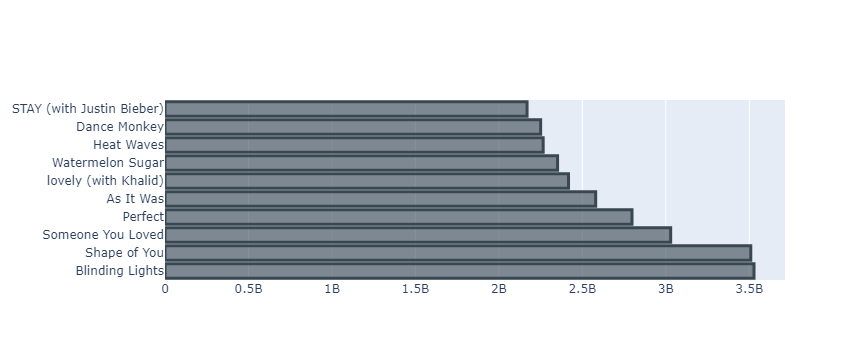

In [33]:
last_10 = df.sort_values(by="streams", ascending=False).head(10)
bar_chart = go.Bar(
    y=last_10.track_name,
    x=last_10.streams,
    orientation='h',
    marker=dict(
        color='rgba(58, 71, 80, 0.6)',
        line=dict(color='rgba(58, 71, 80, 1.0)', width=3)
    )
)

iplot([bar_chart])